In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
plt.style.use('seaborn-white')

<ipython-input-1-6d0fa4db7acd>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [2]:
import morl
from env_LQG import LQG

In [3]:
J_au = np.asarray([-500.0] * 3) 
J_u = np.asarray([-150.0] * 3)

use_B = False

In [37]:
def main(n_obj: int, c_dim: int, n_rep: int, name: str = None):
    for i in range(1, 1 + n_rep):
        
        np.random.seed(i)
        
        policy = morl.make_policy_net(state_dim=n_obj, 
                                      hidden_dim=30, 
                                      act_space=('continuous', n_obj), 
                                      c_dim=c_dim, 
                                      seed=i,
                                      embed_dims=None, 
                                      std=0.2).to(morl.DEVICE)
        
        out = morl.learn(policy=policy, 
                         gradient_steps=800, 
                         n_grad_repeat=1, 
                         group_size_train=300, 
                         group_size_test=300, 
                         env=LQG(n_obj=n_obj, noise_std=0, a_max=10, normalizer=lambda x: x / 5.0 - 1.0), 
                         n_obj=n_obj, 
                         test_repeat=1, 
                         n_jobs=15, 
                         ep_len_train=30, 
                         ep_len_test=30, 
                         nn_k=3, 
                         beta=10.0, 
                         J_AU=J_au, 
                         J_U=J_u, 
                         gamma_train=0.9, 
                         gamma_test=0.9, 
                         mode='median', 
                         score_clipped_above_zero=True,
                         use_QV=False, 
                         QV_params=None
                        )
        if name is None:
            with open('out_{}.pkl'.format(i), 'wb') as f:
                pickle.dump(out, f)
        else:
            with open('out_{}_{}.pkl'.format(name, i), 'wb') as f:
                pickle.dump(out, f)

# c_dim $\in\{1, 2, 3\}$

In [ ]:
%%time
main(n_obj=3, n_rep=5, c_dim=3, name='cdim=3')

In [ ]:
%%time
main(n_obj=3, n_rep=5, c_dim=2, name='cdim=2')

In [ ]:
%%time
main(n_obj=3, n_rep=5, c_dim=1, name='cdim=1')

In [4]:
out_cdim_1 = []
for i in range(1, 6):
    with open('out_cdim=1_{}.pkl'.format(i), 'rb') as f:
        out_cdim_1 += [pickle.load(f)]
        
out_cdim_2 = []
for i in range(1, 6):
    with open('out_cdim=2_{}.pkl'.format(i), 'rb') as f:
        out_cdim_2 += [pickle.load(f)]
        
out_cdim_3 = []
for i in range(1, 6):
    with open('out_cdim=3_{}.pkl'.format(i), 'rb') as f:
        out_cdim_3 += [pickle.load(f)]

In [42]:
[np.max(out_cdim_1[i][0]) for i in range(5)], \
[np.max(out_cdim_2[i][0]) for i in range(5)], \
[np.max(out_cdim_3[i][0]) for i in range(5)]

([0.8035628342501536,
  0.7991254421747522,
  0.803748534073009,
  0.8022862848864996,
  0.8101601070850919],
 [0.8132626338891875,
  0.8083242210919019,
  0.8032565444081453,
  0.7872975266160864,
  0.8078740950940544],
 [0.8100899889424679,
  0.8054058655950455,
  0.8129696526296242,
  0.8168617471888582,
  0.8165364290505037])

In [43]:
(1, np.mean([np.max(out_cdim_1[i][0]) for i in range(5)]), 
 np.std([np.max(out_cdim_1[i][0]) for i in range(5)])), \
(2, np.mean([np.max(out_cdim_2[i][0]) for i in range(5)]), 
 np.std([np.max(out_cdim_2[i][0]) for i in range(5)])), \
(3, np.mean([np.max(out_cdim_3[i][0]) for i in range(5)]), 
 np.std([np.max(out_cdim_3[i][0]) for i in range(5)]))

((1, 0.8037766404939012, 0.003595829652310473),
 (2, 0.8040030042198751, 0.008933411281758686),
 (3, 0.8123727366813001, 0.004280002058488513))

In [44]:
_o1 = np.asarray([out_cdim_1[i][0] for i in range(5)])
_o2 = np.asarray([out_cdim_2[i][0] for i in range(5)])
_o3 = np.asarray([out_cdim_3[i][0] for i in range(5)])

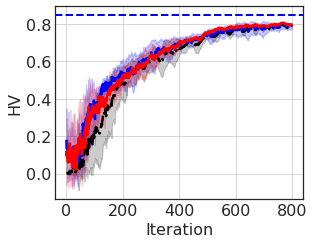

In [48]:
plt.figure(figsize=(4.6, 3.5))
#plt.xticks(np.arange(0, 501, 100))
#plt.ylim(0, 1.3)
plt.tick_params(labelsize=16)
plt.grid()
plt.ylabel('HV', fontsize=16)
plt.xlabel('Iteration', fontsize=16)
plt.axhline(0.847570173033233, ls='--', c='b', lw=2)

plt.plot(_o1.mean(axis=0), c='k', lw=2.5, ls='-.')
plt.fill_between(np.arange(801), 
                 _o1.mean(axis=0) - _o1.std(axis=0), 
                 _o1.mean(axis=0) + _o1.std(axis=0), alpha=0.2, color='k')

plt.plot(_o2.mean(axis=0), c='b', lw=2.5, ls='--')
plt.fill_between(np.arange(801), 
                 _o2.mean(axis=0) - _o2.std(axis=0), 
                 _o2.mean(axis=0) + _o2.std(axis=0), alpha=0.2, color='b')

plt.plot(_o3.mean(axis=0), c='r', lw=2.5)
plt.fill_between(np.arange(801), 
                 _o3.mean(axis=0) - _o3.std(axis=0), 
                 _o3.mean(axis=0) + _o3.std(axis=0), alpha=0.2, color='r')

plt.tight_layout()
# plt.savefig('learning_fruit_{}.png'.format(d_FTN), dpi=400)

In [6]:
# best policies
_oo1 = [out_cdim_1[i][2] for i in range(5)]
_oo2 = [out_cdim_2[i][2] for i in range(5)]
_oo3 = [out_cdim_3[i][2] for i in range(5)]

In [9]:
%%time
TEST_SIZE = 1500
for n, X in enumerate([_oo1, _oo2, _oo3]):
    peak_hv = []
    for i in range(5):
        cs, all_R = morl.group_evaluation_REPEAT(policy=X[i], 
                                                 group_size=TEST_SIZE, 
                                                 n_jobs=15, 
                                                 env=LQG(n_obj=3, noise_std=0, a_max=10, normalizer=lambda x: x / 5.0 - 1.0)\
                                                 .set_ep_len(30), 
                                                 seed=1, deterministic=True, n_obj=3, gamma=0.9, 
                                                 n_episode_repeat=1)
        
        peak_hv += [morl.HV(Rs=np.asarray(all_R), ref_point=J_au) / 350**3]
    
    print(n + 1, np.mean(peak_hv), np.std(peak_hv))

1 0.8124414896418717 0.0036434315389890903
2 0.8153459264798031 0.010554258768837402
3 0.8208351248157543 0.0037410780469787513
CPU times: user 17.5 s, sys: 998 ms, total: 18.5 s
Wall time: 51.3 s


# Comparison with true PF

In [16]:
w1 = np.arange(0.01, 1, 0.01)
w2 = [np.arange(0.01, 1 - w - 1e-4, 0.01) for w in w1]
w_12 = np.vstack([np.vstack([[w1[i]] * len(w2[i]), w2[i]]).T for i in range(len(w1))])
ws = np.hstack([w_12, np.reshape(1 - np.sum(w_12, axis=-1), (-1, 1))])

In [18]:
ws

array([[0.01, 0.01, 0.98],
       [0.01, 0.02, 0.97],
       [0.01, 0.03, 0.96],
       ...,
       [0.97, 0.01, 0.02],
       [0.97, 0.02, 0.01],
       [0.98, 0.01, 0.01]])

In [22]:
ws.shape

(4851, 3)

In [19]:
%%time
from optimal_lqg_solver import MO_LQG_return

opt_Rs = np.asarray([MO_LQG_return(xi=0.1, gamma=0.9, w=w, x_init=[10.0]*3, 
                                   n_repeat=1, T_horizon=30, noise_std=0)
         for w in ws])

CPU times: user 32min, sys: 42min 47s, total: 1h 14min 47s
Wall time: 24min 49s


In [ ]:
with open('lqg_3d_opt_Rs.pkl', 'wb') as f:
    pickle.dump(opt_Rs, f)

In [27]:
opt_Rs

array([[-296.22032099, -296.22032099, -162.31033959],
       [-295.26401022, -290.42421563, -162.40891529],
       [-294.37029445, -285.11158905, -162.55546303],
       ...,
       [-162.40891529, -295.26401022, -290.42421563],
       [-162.40891529, -290.42421563, -295.26401022],
       [-162.31033959, -296.22032099, -296.22032099]])

In [32]:
# optimal HV
morl.HV((opt_Rs - J_au) / (J_u - J_au), ref_point=np.zeros(3))

0.847570173033233

# Q と V を使用

In [50]:
def main_QV(n_obj: int, c_dim: int, n_rep: int, name: str = None):
    for i in range(1, 1 + n_rep):
        
        np.random.seed(i)
        
        policy = morl.make_policy_net(state_dim=n_obj, 
                                      hidden_dim=30, 
                                      act_space=('continuous', n_obj), 
                                      c_dim=c_dim, 
                                      seed=i,
                                      embed_dims=None, 
                                      std=0.2).to(morl.DEVICE)
        
        out = morl.learn(policy=policy, 
                         gradient_steps=800, 
                         n_grad_repeat=1, 
                         group_size_train=300, 
                         group_size_test=300, 
                         env=LQG(n_obj=n_obj, noise_std=0, a_max=10, normalizer=lambda x: x / 5.0 - 1.0), 
                         n_obj=n_obj, 
                         test_repeat=1, 
                         n_jobs=15, 
                         ep_len_train=30, 
                         ep_len_test=30, 
                         nn_k=3, 
                         beta=10.0, 
                         J_AU=J_au, 
                         J_U=J_u, 
                         gamma_train=0.9, 
                         gamma_test=0.9, 
                         mode='median', 
                         score_clipped_above_zero=False,    # no clipping
                         use_QV=True, 
                         QV_params={
                             'n_epochs': 1, 
                             'hidden_size': 30,
                             'batch_size': 100
                         }
                        )
        if name is None:
            with open('out_QV_{}.pkl'.format(i), 'wb') as f:
                pickle.dump(out, f)
        else:
            with open('out_QV_{}_{}.pkl'.format(name, i), 'wb') as f:
                pickle.dump(out, f)

In [ ]:
%%time
main_QV(n_obj=3, n_rep=5, c_dim=3, name='cdim=3')

In [10]:
out_qv = []
for i in range(1, 6):
    with open('out_QV_cdim=3_{}.pkl'.format(i), 'rb') as f:
        out_qv += [pickle.load(f)]

In [76]:
[np.max(out_qv[i][0]) for i in range(5)]

[0.7240293380952527,
 0.7308214647956259,
 0.7562047390039931,
 0.752537350059432,
 nan]

In [78]:
(np.mean([np.max(out_qv[i][0]) for i in range(4)]), 
 np.std([np.max(out_qv[i][0]) for i in range(4)]))

(0.7408982229885759, 0.013746445401676848)

In [79]:
# _oqv = np.asarray([out_qv[i][0] for i in range(5)])
_oqv = np.asarray([out_qv[i][0] for i in range(4)])

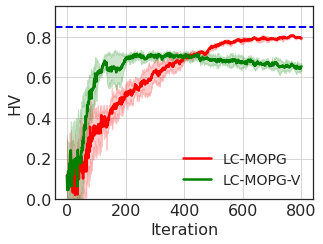

In [83]:
plt.figure(figsize=(4.6, 3.5))
#plt.xticks(np.arange(0, 501, 100))
plt.ylim(0, 0.95)
plt.tick_params(labelsize=16)
plt.grid()
plt.ylabel('HV', fontsize=16)
plt.xlabel('Iteration', fontsize=16)

plt.plot(_o3.mean(axis=0), c='r', lw=2.5, label='LC-MOPG')
plt.fill_between(np.arange(801), 
                 _o3.mean(axis=0) - _o3.std(axis=0), 
                 _o3.mean(axis=0) + _o3.std(axis=0), alpha=0.2, color='r')

plt.plot(np.nanmean(_oqv, axis=0), c='g', lw=2.5, label='LC-MOPG-V')
plt.fill_between(np.arange(801), 
                 np.mean(_oqv, axis=0) - np.std(_oqv, axis=0), 
                 np.mean(_oqv, axis=0) + np.std(_oqv, axis=0), 
                 alpha=0.2, color='g')

plt.axhline(0.847570173033233, ls='--', c='b', lw=2)
plt.legend(fontsize=14)
plt.tight_layout()
# plt.savefig('learning_lqg3.png', dpi=400)

In [11]:
# best policies
_oo_qv = [out_qv[i][2] for i in range(4)]

In [12]:
%%time
TEST_SIZE = 1500

peak_hv = []

for i in range(4):
    cs, all_R = morl.group_evaluation_REPEAT(policy=_oo_qv[i], 
                                             group_size=TEST_SIZE, 
                                             n_jobs=15, 
                                             env=LQG(n_obj=3, noise_std=0, a_max=10, 
                                                     normalizer=lambda x: x / 5.0 - 1.0)\
                                             .set_ep_len(30), 
                                             seed=1, deterministic=True, n_obj=3, gamma=0.9, 
                                             n_episode_repeat=1)

    peak_hv += [morl.HV(Rs=np.asarray(all_R), ref_point=J_au) / 350**3]

print(np.mean(peak_hv), np.std(peak_hv))

0.7544053023655617 0.015183103445407879
CPU times: user 4.43 s, sys: 1.1 s, total: 5.53 s
Wall time: 14.7 s
